In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
# Creating dataFrame
df_sonar=pd.DataFrame(data=data)
df_sonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### It is Categorical data thus I will use Logistic Regression Model and Classification Models.

In [4]:
df_sonar.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

### Using Label Encoder to convert object data to binary for further evaluation

In [5]:
# using Label Encoding
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=[60]
for val in list1:
    df_sonar[val]=le.fit_transform(df_sonar[val].astype(str))

In [6]:
df_sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

In [7]:
# checking whether data contains null value or not
df_sonar.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [8]:
x=df_sonar.iloc[:,0:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [9]:
y=df_sonar.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int32

In [10]:
# using PCA to get highly correlated columns
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
mpca=pca.fit_transform(x)
mpca

array([[-0.97028528,  1.01765376,  0.83043188, ...,  0.38483746,
         0.00432916, -0.08267912],
       [-0.32443537,  0.87687629,  0.22820349, ...,  0.08107182,
         0.01418477, -0.43233413],
       [ 0.85357147,  0.69773427, -0.02360152, ..., -0.21542372,
        -0.53395533, -0.42518212],
       ...,
       [ 0.30676251, -1.1477555 ,  0.24897546, ...,  0.2278663 ,
        -0.07013224, -0.31329401],
       [-0.03808313, -0.99404889,  0.20193818, ...,  0.06950374,
        -0.02440647, -0.16530256],
       [-0.04390414, -0.91080234,  0.00916917, ..., -0.01910024,
         0.12012993, -0.13796362]])

In [11]:
df=pd.DataFrame(data=mpca)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [12]:
df[10]=y
df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,1
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,1
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,1
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,1
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,1
...,...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631,0
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679,0
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294,0
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303,0


In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,207.000000
mean,5.953370e-17,9.600479e-17,-1.405377e-17,-7.736699e-17,-5.457256e-17,-2.594543e-17,1.080054e-16,7.676361e-17,-4.149928e-17,6.033821e-17,0.463768
std,7.483084e-01,5.979380e-01,3.867577e-01,3.358322e-01,3.007149e-01,2.794417e-01,2.701564e-01,2.149771e-01,1.979075e-01,1.824339e-01,0.499894
min,-1.400483e+00,-1.149870e+00,-9.271157e-01,-7.043437e-01,-7.021742e-01,-5.731973e-01,-7.418372e-01,-6.404248e-01,-5.872373e-01,-5.274440e-01,0.000000
25%,-5.858327e-01,-4.535057e-01,-2.352042e-01,-2.264010e-01,-2.173866e-01,-1.843344e-01,-1.765243e-01,-1.330234e-01,-1.133736e-01,-9.989902e-02,0.000000
50%,4.991800e-02,-5.663978e-02,-1.530817e-02,-2.208635e-02,7.676589e-03,-4.602056e-03,-1.318133e-02,4.962341e-03,-1.542833e-02,2.484047e-03,0.000000
75%,4.910975e-01,3.986697e-01,2.146323e-01,2.109728e-01,1.950131e-01,1.691461e-01,1.217503e-01,1.188499e-01,9.952790e-02,1.114356e-01,1.000000
max,1.704758e+00,1.483897e+00,1.098007e+00,9.234228e-01,7.933962e-01,8.335477e-01,8.895701e-01,6.485273e-01,5.874626e-01,5.617092e-01,1.000000


In [14]:
df.skew()

0     0.182486
1     0.412060
2     0.182902
3     0.438051
4    -0.057592
5     0.283933
6     0.415527
7     0.060027
8     0.226722
9    -0.297189
10    0.146372
dtype: float64

In [15]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)
df_new

(207, 11)
(204, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,1
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,1
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,1
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,1
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,1
...,...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631,0
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679,0
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294,0
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303,0


In [16]:
# Checking Skewness
df_new.skew()

0     0.197912
1     0.426983
2     0.203336
3     0.466608
4    -0.063192
5     0.280952
6     0.290709
7    -0.039269
8     0.226492
9    -0.440861
10    0.118726
dtype: float64

In [17]:
x1=df_new.iloc[:,0:-1]
x1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
5,-0.155512,0.397189,-0.236508,-0.184495,-0.219554,0.377336,0.022937,-0.027861,0.105051,-0.473107
6,-0.605470,-0.050505,0.001244,-0.237550,-0.664685,0.061253,-0.135593,0.208654,-0.018795,0.283649
7,-0.381704,-0.075134,-0.029934,-0.257844,-0.536723,-0.506412,0.099131,-0.070338,-0.253648,0.286475
8,-0.176107,-1.010684,0.088104,-0.314870,0.007677,-0.104833,0.208576,-0.172005,0.078535,-0.289523
9,1.121184,-0.458966,0.177197,-0.288348,0.310049,-0.208691,-0.029574,0.045429,-0.153713,-0.198286


In [18]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

,0,1,2,3,4,5,6,7,8,9
0,-1.287983,1.703548,2.164066,0.377536,0.989237,0.722170,-0.846284,1.854656,0.021876,-0.453338
1,-0.425492,1.468719,0.586190,2.622949,0.321340,-0.973695,-1.593318,0.404192,0.071774,-2.410105
2,1.147659,1.169895,-0.073554,-0.352879,-1.945569,1.258190,1.858104,-1.011557,-2.703433,-2.370081
3,-0.074142,0.383061,1.652540,0.475776,0.497156,0.285190,-1.412091,0.352007,0.604748,-2.382943
4,-0.800733,1.510564,2.096254,0.832597,1.645990,1.662928,-0.838311,0.520856,-1.027023,-1.306037
...,...,...,...,...,...,...,...,...,...,...
199,0.074432,-1.710408,0.684262,0.095265,-0.053325,0.344121,0.070331,0.871784,0.148616,-1.493977
200,0.312748,-1.912062,0.513441,0.147572,0.600260,0.030155,0.349664,1.287938,-0.349201,-1.712498
201,0.417431,-1.908535,0.640614,-0.158355,0.531554,0.043167,0.213647,1.105128,-0.355119,-1.743924
202,-0.043088,-1.652140,0.517373,-0.165049,-0.494903,-0.325808,0.095774,0.348955,-0.123611,-0.915722


In [19]:
y=df_new.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 10, Length: 204, dtype: int32

In [20]:
x.shape

(204, 10)

In [21]:
y.shape

(204,)

### Using Grid Search

In [22]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [23]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,10)


{'criterion': 'gini', 'max_depth': 4, 'random_state': 10}


In [24]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.01, 'n_estimators': 100}


In [25]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,10)

{'n_neighbors': 23}


In [26]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [27]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 10}


In [28]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200, 700,1000,2000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)

{'max_features': 'log2', 'n_estimators': 1000}


In [29]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=23)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.10)
DT=DecisionTreeClassifier(max_depth=4,random_state=10)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
RF=RandomForestClassifier(n_estimators= 2000,)

In [30]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [31]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  73 is: 0.8


Learning Score :  0.8
Accuracy Score :  0.8


Cross Val Score :  0.6520050125313284


roc auc score :  0.7916666666666666


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.88      0.67      0.76        21

    accuracy                           0.80        45
   macro avg       0.82      0.79      0.79        45
weighted avg       0.81      0.80      0.80        45



Confusion Matrix:
 [[22  2]
 [ 7 14]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sha

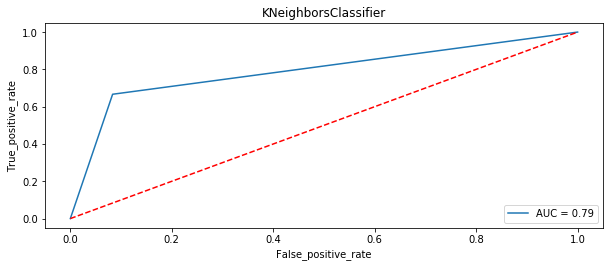

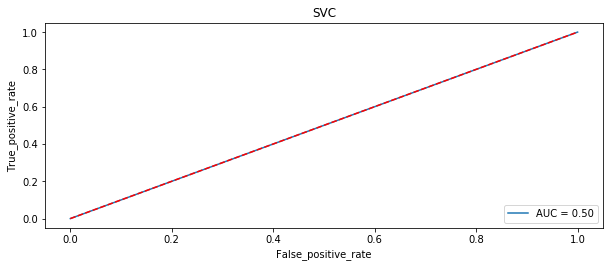

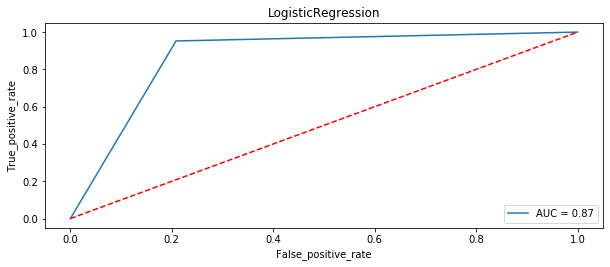

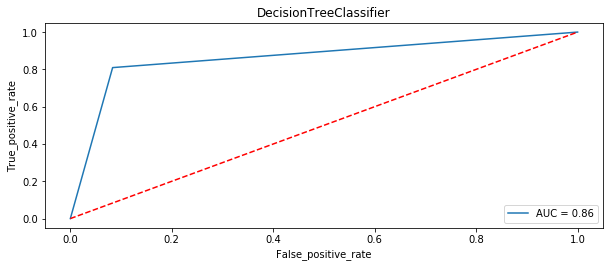

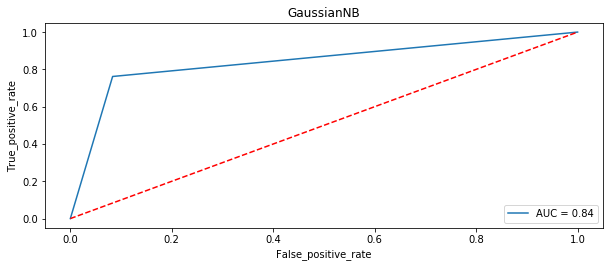

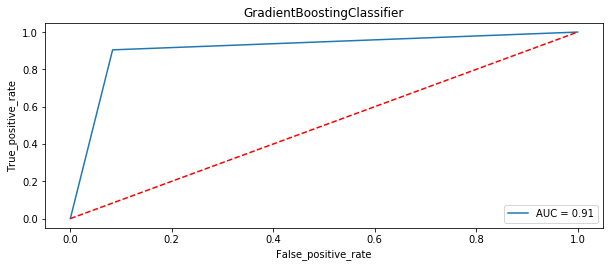

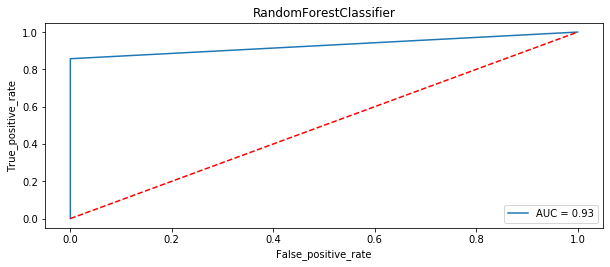

In [32]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

In [33]:
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score':Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})  
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,80.000000,80.000000,65.200501,79.166667
1,SVC,53.333333,53.333333,52.954887,50.000000
2,LogisticRegression,86.666667,86.666667,65.721805,87.202381
3,DecisionTreeClassifier,86.666667,86.666667,68.152882,86.309524
4,GaussianNB,84.444444,84.444444,63.369674,83.928571
5,GradientBoostingClassifier,91.111111,91.111111,68.556391,91.071429
6,RandomForestClassifier,93.333333,93.333333,67.453634,92.857143


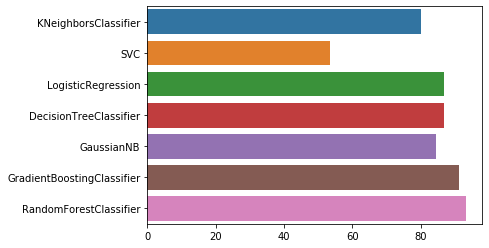

In [34]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

### After all this process conclusion is that RandomForest is performing well.

In [35]:
#Using RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=.22,stratify=y)
rf=RandomForestClassifier(n_estimators=2000)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 0.9111111111111111
Confusion Matrix: [[24  0]
 [ 4 17]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.81      0.89        21

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.91        45
weighted avg       0.92      0.91      0.91        45



In [36]:
#As i am getting highest accuracy score for RandomForest thus using adabooster for the same.
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
ad = AdaBoostClassifier(n_estimators=100, base_estimator=rf)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred),'\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,adpred),'\n')
print('Classification Report:','\n',classification_report(y_test,adpred))


Accuracy Score: 1.0 

Confusion Matrix: 
 [[24  0]
 [ 0 21]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(2.0, 0.0)

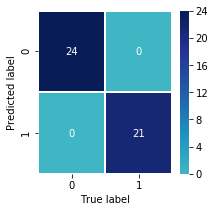

In [37]:
# Plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, adpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [38]:
test=pd.DataFrame(data=y_test)
test['ypred']=adpred
test

,10,ypred
58,1,1
108,0,0
67,1,1
29,1,1
38,1,1
75,1,1
174,0,0
122,0,0
198,0,0
141,0,0


In [39]:
from sklearn.externals import joblib
joblib.dump(ad,'Sonar_Dataset.pkl')

['Sonar_Dataset.pkl']

In [40]:
final=joblib.load('Sonar_Dataset.pkl')
joblib_y_preds = final.predict(x_test)
joblib_y_preds

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0])